<a href="https://colab.research.google.com/github/vicksCoghi/data_Manual/blob/main/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [5]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass','female','age','fare']
titanic['female'] = titanic['sex'].map({'male':0,'female':1})
titanic.dropna(subset=feature_names, inplace=True)

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.25,
                                                 random_state=123
                                                 )

In [ ]:
print('Tamanho de X_train : ',X_train.shape)
print('Tamanho de X_test : ',X_test.shape)
print('Tamanho de y_train : ',y_train.shape)
print('Tamanho de y_test : ',y_test.shape)

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(4,\
                             activation='relu',input_shape=X_train[0].shape))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

In [10]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
batch_size = 32 # X_train 535 / 32 = 16.71 (então são 17 batches de 32)
epochs = 100

history = model.fit(X_train,y_train,
                    batch_size = batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test,y_test))

<ipython-input-14-45af75ad7c7e>:12: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Treino','Teste'], loc='upperleft')


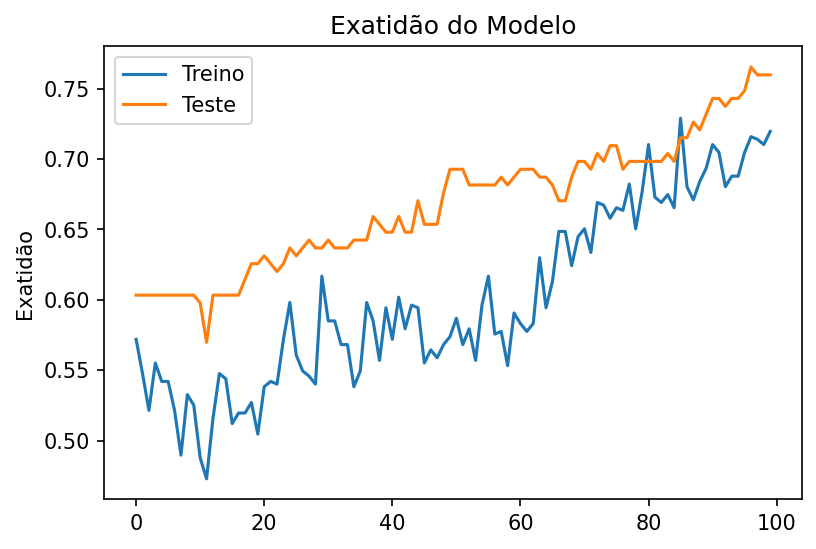

In [14]:
import matplotlib
import matplotlib.pyplot  as plt

matplotlib.rcParams['figure.dpi'] = 150

#plot acurácia de treino e validação

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do Modelo')
plt.ylabel('Exatidão')
plt.legend(['Treino','Teste'], loc='upperleft')
plt.show()

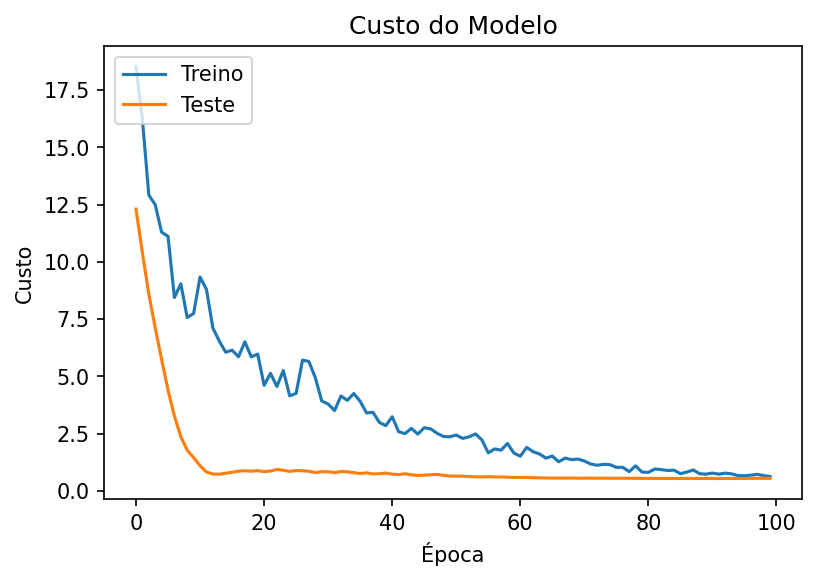

In [15]:
#plot de custo de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino','Teste'],loc='upper left')
plt.show()

In [16]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7598


[0.5437130928039551, 0.7597765326499939]

In [17]:
(model.predict(X_test) > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    